In [231]:
# Importing the Libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor
import xgboost as xgb
from sklearn import tree
import joblib
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.linear_model import Lasso, LassoCV, LinearRegression, Ridge
import statsmodels.formula.api as sm
from sklearn.svm import SVR

In [88]:
# Installing libraries that are not already installed
!pip install Ipython lightgbm seaborn xgboost

In [3]:
# Importing the datasets
data_train = pd.read_csv('./intern_data.csv')             # train dataset
data_test = pd.read_csv('./intern_test.csv')        # test dataset

In [4]:
data_train

,Unnamed: 0,a,b,c,d,e,f,g,h,y
0,7,0.951786,0.669570,green,0.170130,0.623469,0.925886,0.812685,white,3.707514
1,43,0.510447,0.922627,red,0.087899,0.025415,0.698444,0.658545,white,2.689243
2,47,0.294838,0.351081,yellow,0.710892,0.699661,0.545722,0.836863,black,2.886508
3,53,0.798645,0.572042,green,0.026137,0.609730,0.488668,0.342675,black,2.478168
4,54,0.689666,0.395323,red,0.172448,0.736433,0.708408,0.695521,white,3.182666
5,64,0.834692,0.268175,blue,0.624388,0.697708,0.392404,0.571713,white,2.354896
6,103,0.558480,0.540930,yellow,0.061879,0.361444,0.536288,0.542901,white,2.890995
7,107,0.270433,0.025224,green,0.717872,0.265832,0.589349,0.347812,white,2.594366
8,109,0.555350,0.585715,green,0.151772,0.917405,0.844082,0.337620,white,3.649641
9,128,0.449391,0.988158,green,0.511197,0.059155,0.972969,0.584605,white,3.239385


In [5]:
data_test

,Unnamed: 0,a,b,c,d,e,f,g,h
0,1,0.213254,0.707218,green,0.206151,0.010148,0.190193,0.497651,black
1,2,0.867987,0.494110,green,0.510344,0.922549,0.649631,0.952224,black
2,3,0.419168,0.579660,yellow,0.832660,0.351641,0.105251,0.277489,white
3,4,0.706512,0.948891,blue,0.546916,0.771624,0.683572,0.311848,white
4,5,0.344634,0.942960,yellow,0.570995,0.315698,0.651284,0.677366,white
5,6,0.705707,0.559254,blue,0.394597,0.645392,0.578195,0.609545,black
6,8,0.954670,0.249721,blue,0.973839,0.713764,0.678933,0.837376,white
7,9,0.971844,0.626594,red,0.487489,0.130576,0.586681,0.049419,white
8,10,0.340954,0.945636,yellow,0.461561,0.433979,0.257564,0.314688,white
9,11,0.223310,0.523015,green,0.492258,0.968786,0.419971,0.544552,white


In [6]:
# Renaming the first column that indicates ID
data_train = data_train.rename(columns = {data_train.columns[0]:'ID'})
data_test = data_test.rename(columns = {data_test.columns[0]:'ID'})

In [7]:
data_train

,ID,a,b,c,d,e,f,g,h,y
0,7,0.951786,0.669570,green,0.170130,0.623469,0.925886,0.812685,white,3.707514
1,43,0.510447,0.922627,red,0.087899,0.025415,0.698444,0.658545,white,2.689243
2,47,0.294838,0.351081,yellow,0.710892,0.699661,0.545722,0.836863,black,2.886508
3,53,0.798645,0.572042,green,0.026137,0.609730,0.488668,0.342675,black,2.478168
4,54,0.689666,0.395323,red,0.172448,0.736433,0.708408,0.695521,white,3.182666
5,64,0.834692,0.268175,blue,0.624388,0.697708,0.392404,0.571713,white,2.354896
6,103,0.558480,0.540930,yellow,0.061879,0.361444,0.536288,0.542901,white,2.890995
7,107,0.270433,0.025224,green,0.717872,0.265832,0.589349,0.347812,white,2.594366
8,109,0.555350,0.585715,green,0.151772,0.917405,0.844082,0.337620,white,3.649641
9,128,0.449391,0.988158,green,0.511197,0.059155,0.972969,0.584605,white,3.239385


In [8]:
data_test

,ID,a,b,c,d,e,f,g,h
0,1,0.213254,0.707218,green,0.206151,0.010148,0.190193,0.497651,black
1,2,0.867987,0.494110,green,0.510344,0.922549,0.649631,0.952224,black
2,3,0.419168,0.579660,yellow,0.832660,0.351641,0.105251,0.277489,white
3,4,0.706512,0.948891,blue,0.546916,0.771624,0.683572,0.311848,white
4,5,0.344634,0.942960,yellow,0.570995,0.315698,0.651284,0.677366,white
5,6,0.705707,0.559254,blue,0.394597,0.645392,0.578195,0.609545,black
6,8,0.954670,0.249721,blue,0.973839,0.713764,0.678933,0.837376,white
7,9,0.971844,0.626594,red,0.487489,0.130576,0.586681,0.049419,white
8,10,0.340954,0.945636,yellow,0.461561,0.433979,0.257564,0.314688,white
9,11,0.223310,0.523015,green,0.492258,0.968786,0.419971,0.544552,white


# Preliminary Data Exploration

In [9]:
# checking if the ID is actually unique and if there are no duplicates
data_train.ID.nunique()

500

In [10]:
data_test.ID.nunique()

4500

In [11]:
# checking the shape of the dataset
data_train.shape

(500, 10)

In [12]:
data_test.shape

(4500, 9)

In [13]:
# checking the column of features of the dataset
data_train.columns

Index(['ID', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'y'], dtype='object')

In [14]:
data_test.columns

Index(['ID', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], dtype='object')

In [15]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
ID    500 non-null int64
a     500 non-null float64
b     500 non-null float64
c     500 non-null object
d     500 non-null float64
e     500 non-null float64
f     500 non-null float64
g     500 non-null float64
h     500 non-null object
y     500 non-null float64
dtypes: float64(7), int64(1), object(2)
memory usage: 39.1+ KB


# Data Exploration

In [615]:
# Checking summary statistics for train dataset and test dataset
data_train[['a', 'b', 'd', 'e', 'f', 'g', 'y']].describe()

,a,b,d,e,f,g,y
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,0.497676,0.506123,0.501991,0.502522,0.527120,0.508032,2.686212
std,0.293181,0.292292,0.284845,0.271935,0.292202,0.284469,0.588197
min,0.002801,0.000369,0.000592,0.002387,0.001327,0.005644,1.259850
25%,0.253531,0.257873,0.252154,0.270674,0.265169,0.262722,2.301999
50%,0.510447,0.515074,0.501429,0.515187,0.506913,0.525117,2.727477
75%,0.760466,0.766648,0.735729,0.732255,0.791538,0.742643,3.155790
max,0.999690,0.997025,0.998282,0.998994,0.999271,0.998156,3.980509


In [616]:
data_test[['a', 'b', 'd', 'e', 'f', 'g']].describe()

,a,b,d,e,f,g
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,0.496772,0.507221,0.493057,0.503815,0.506166,0.490688
std,0.287946,0.288317,0.289800,0.291611,0.285590,0.287709
min,0.000300,0.000026,0.000016,0.000297,0.000046,0.000071
25%,0.243134,0.258007,0.241462,0.249646,0.264184,0.239513
50%,0.497894,0.513464,0.497224,0.503613,0.507248,0.485594
75%,0.748851,0.758015,0.743501,0.760773,0.753014,0.735778
max,0.999647,0.999684,0.999683,0.999236,0.999982,0.999879


In [617]:
data_train.y.median()

2.72747653703808

In [ ]:
data_train.y.

In [18]:
# checking the number of classes & proportion of the classes of the categorical features
data_train.c.value_counts()

yellow    134
green     124
blue      123
red       119
Name: c, dtype: int64

In [19]:
data_test.h.value_counts()

white    3625
black     875
Name: h, dtype: int64

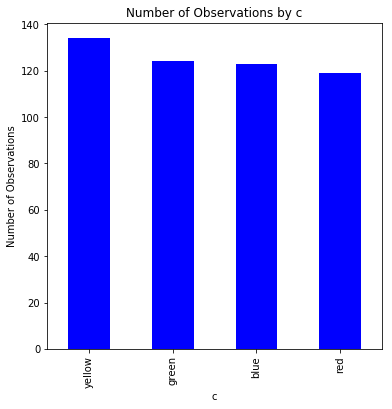

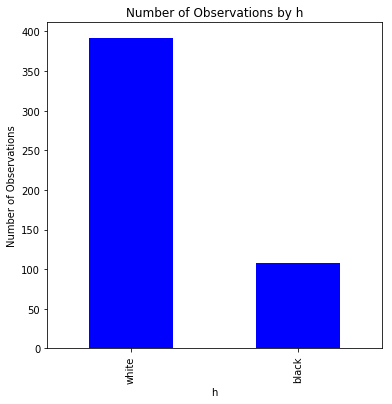

In [20]:
# Visualization of the Frequencies of the Categorical Features
def plot_bars(pred, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define ais
        counts = pred[col].value_counts()
        counts.plot.bar(ax = ax, color = 'blue')
        ax.set_title('Number of Observations by ' + col) # Plot main title
        ax.set_xlabel(col)
        ax.set_ylabel('Number of Observations')
        plt.show()
        
        
cat_cols = ['c', 'h']
plot_bars(data_train, cat_cols)
    

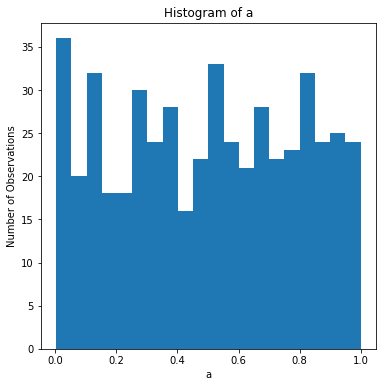

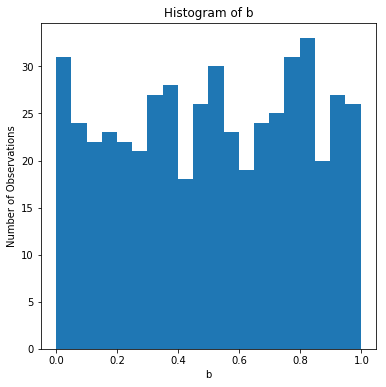

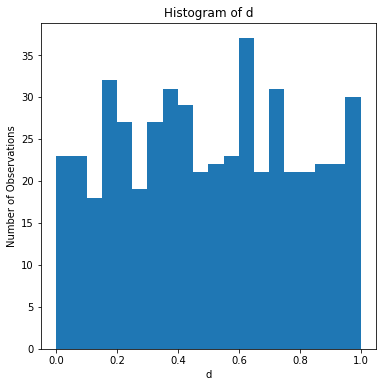

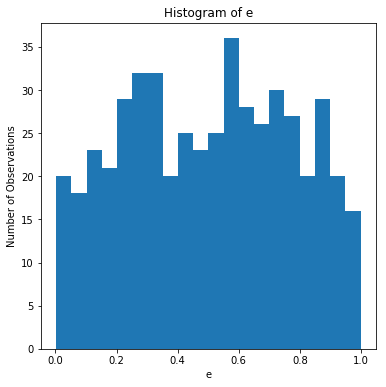

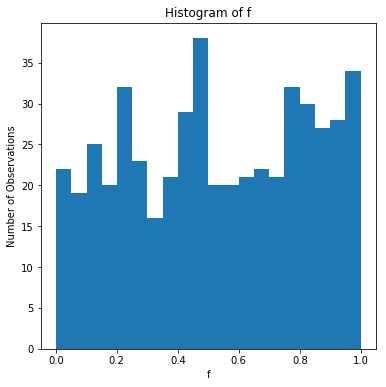

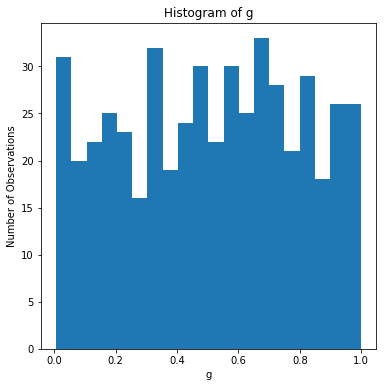

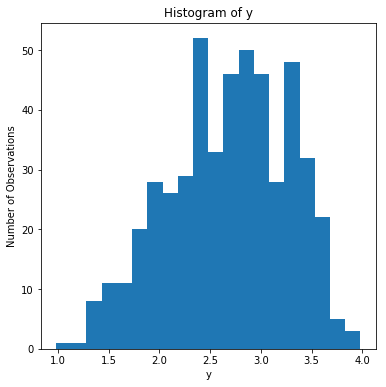

In [21]:
# Visualization of the Distribution of the Numerical Features
def plot_histogram(pred, cols, bins = 20):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define ais
        pred[col].plot.hist(ax = ax, bins = bins)
        ax.set_title('Histogram of ' + col) # Plot main title
        ax.set_xlabel(col)
        ax.set_ylabel('Number of Observations')
        plt.show()
        
        
num_cols = ['a', 'b', 'd', 'e', 'f', 'g', 'y']
plot_histogram(data_train, num_cols)
    

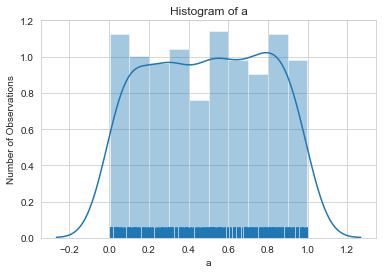

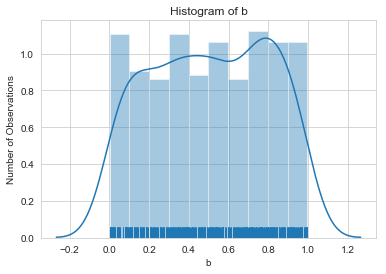

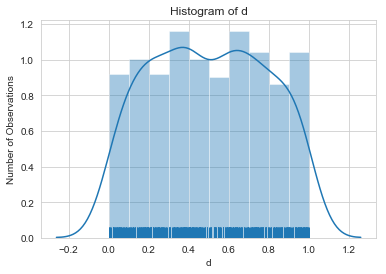

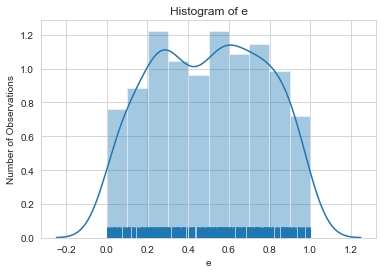

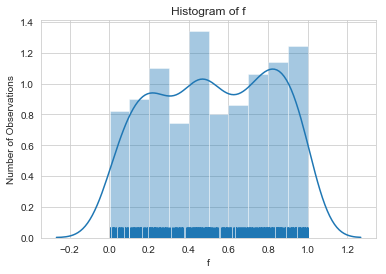

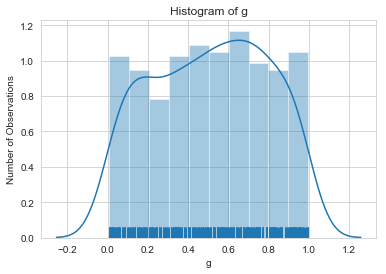

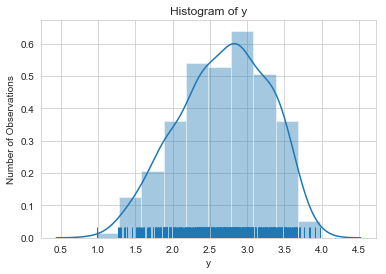

In [22]:
def plot_density_plot(pred, cols, bins = 10, hist = True):
    for col in cols:
        sns.set_style('whitegrid')
        sns.distplot(pred[col], bins = bins, rug = True, hist = hist)
        plt.title('Histogram of ' + col) # Plot main title
        plt.xlabel(col) # Sets label for x axis
        plt.ylabel('Number of Observations') # Sets label for  axis
        plt.show()

plot_density_plot(data_train, num_cols)

In [23]:
# Correlation between Numerical Features
corr_cols = ['a', 'b', 'd', 'e', 'f', 'g']
for col in corr_cols:
    print(data_train[col].corr(data_train['y']))

0.013252771112378646
0.1747626068438518
-0.032978027313162454
0.4233753016740323
0.30202908524718514
0.31522293038843185


In [24]:
# Correlation Matrix of Numerical Features
data_train[['a', 'b', 'd', 'e', 'f', 'g', 'y']].corr()

,a,b,d,e,f,g,y
a,1.000000,-0.075675,0.001265,0.035046,0.045703,0.004052,0.013253
b,-0.075675,1.000000,0.034759,-0.065941,0.009250,-0.011903,0.174763
d,0.001265,0.034759,1.000000,0.004201,0.006584,-0.014236,-0.032978
e,0.035046,-0.065941,0.004201,1.000000,-0.075285,0.062324,0.423375
f,0.045703,0.009250,0.006584,-0.075285,1.000000,0.041599,0.302029
g,0.004052,-0.011903,-0.014236,0.062324,0.041599,1.000000,0.315223
y,0.013253,0.174763,-0.032978,0.423375,0.302029,0.315223,1.000000


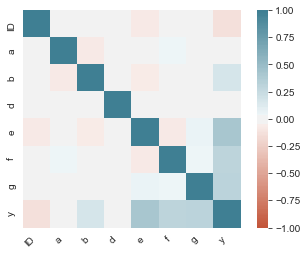

In [25]:
# Correlation Matrix Heatmap for the Train Dataset
corr = data_train.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

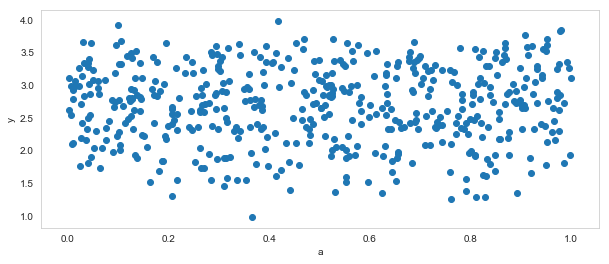

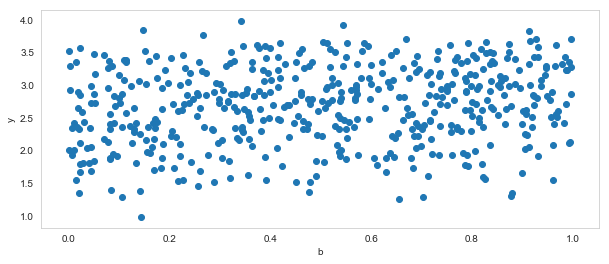

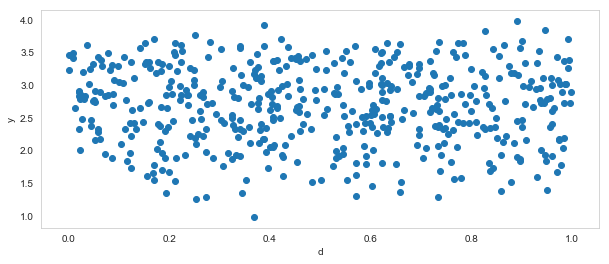

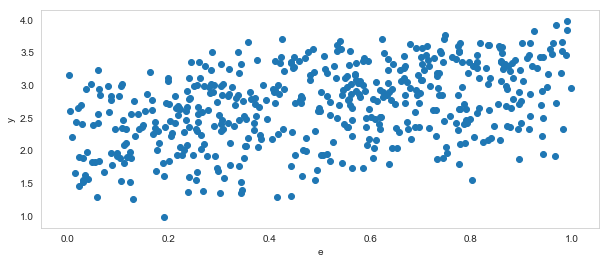

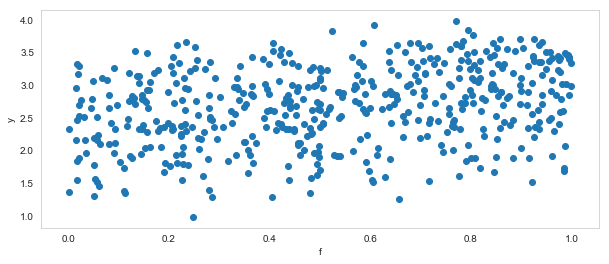

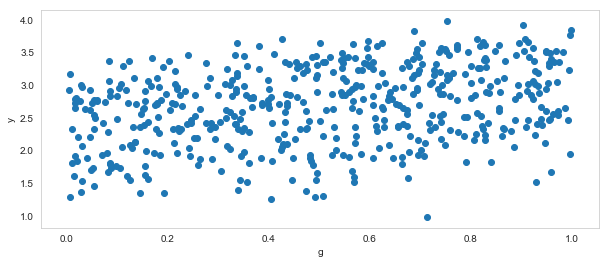

In [26]:
# Scatter plot visualizing the relationship between the Independent 
# Numerical Features and Dependent Numerical Feature
def plot_scatter(columns, target):
    for col in columns:
        plt.figure(figsize=(10,4))
        plt.xlabel(col)
        plt.ylabel(target)
        plt.grid()
        plt.scatter(data_train[col], data_train[target])
        plt.show()

corr_cols = ['a', 'b', 'd', 'e', 'f', 'g']
plot_scatter(corr_cols, 'y')

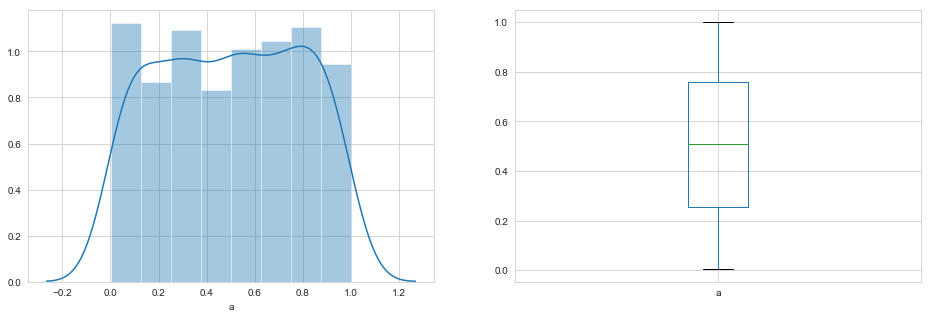

In [27]:
# Visualization of the Distribution of Numerical Features and
# Identification of Outliers via visualization

plt.figure(1)
plt.subplot(121)
sns.distplot(data_train['a'])

plt.subplot(122)
data_train['a'].plot.box(figsize=(16,5))

plt.show()

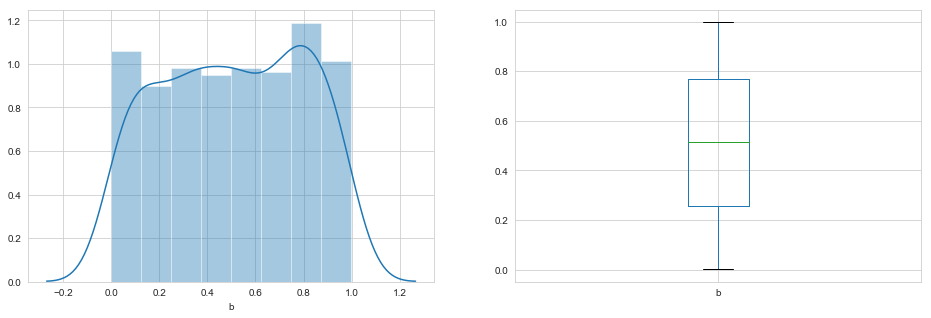

In [28]:
plt.figure(2)
plt.subplot(121)
sns.distplot(data_train['b'])

plt.subplot(122)
data_train['b'].plot.box(figsize=(16,5))

plt.show()

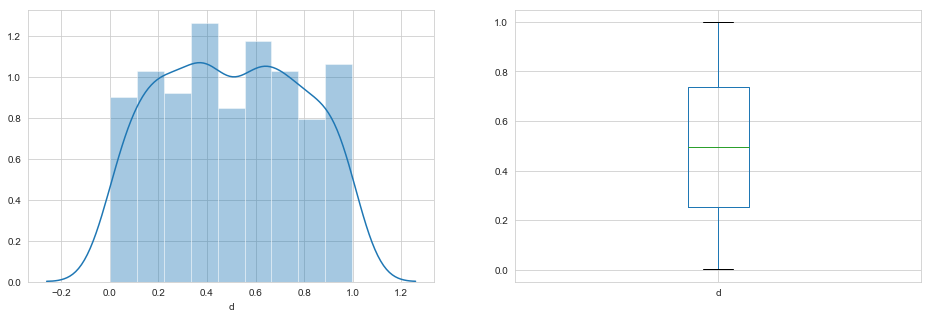

In [29]:
plt.figure(3)
plt.subplot(121)
sns.distplot(data_train['d'])

plt.subplot(122)
data_train['d'].plot.box(figsize=(16,5))

plt.show()

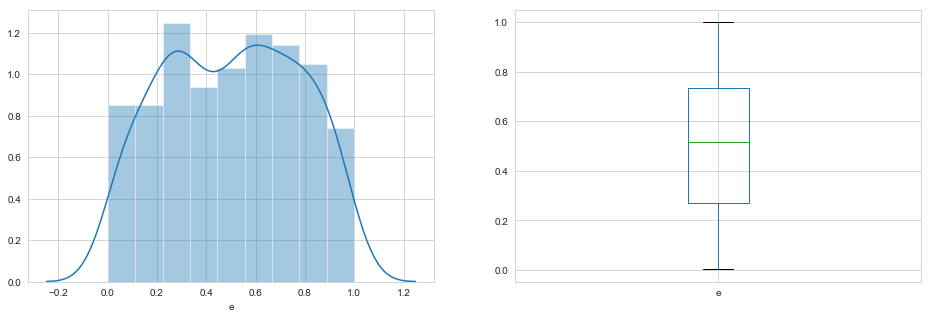

In [30]:
plt.figure(4)
plt.subplot(121)
sns.distplot(data_train['e'])

plt.subplot(122)
data_train['e'].plot.box(figsize=(16,5))

plt.show()

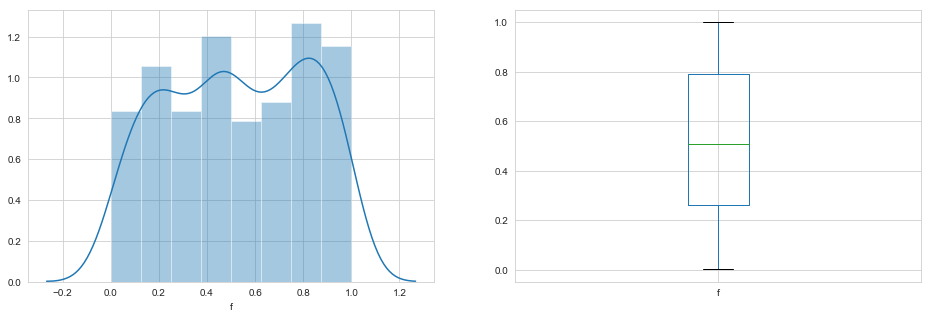

In [31]:
plt.figure(5)
plt.subplot(121)
sns.distplot(data_train['f'])

plt.subplot(122)
data_train['f'].plot.box(figsize=(16,5))

plt.show()

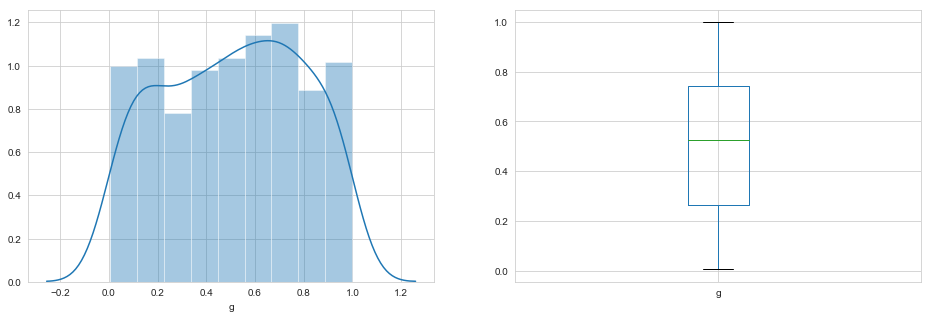

In [32]:
plt.figure(6)
plt.subplot(121)
sns.distplot(data_train['g'])

plt.subplot(122)
data_train['g'].plot.box(figsize=(16,5))

plt.show()

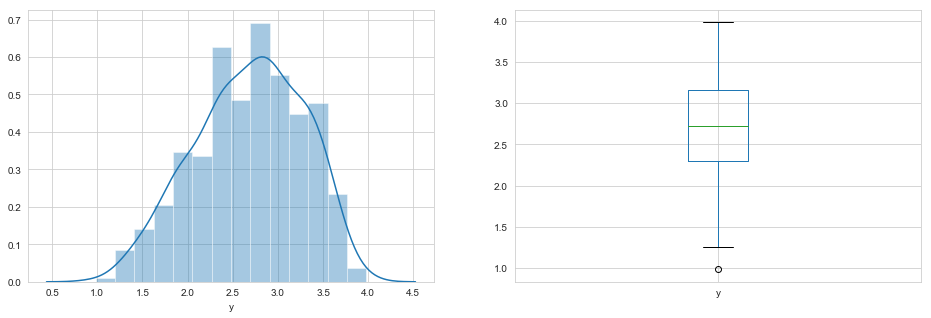

In [33]:
plt.figure(7)
plt.subplot(121)
sns.distplot(data_train['y'])

plt.subplot(122)
data_train['y'].plot.box(figsize=(16,5))

plt.show()

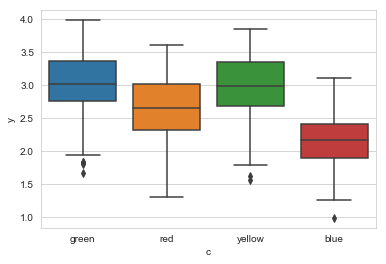

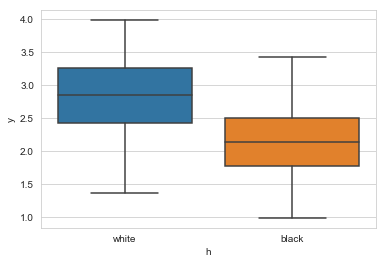

In [34]:
# Box Plot by unique classes of Categorical Features
def plot_box(pred, cols, col_y = 'y'):
    for col in cols:
        sns.set_style('whitegrid')
        sns.boxplot(col, col_y, data = pred)
        plt.xlabel(col) # Sets label for x axis
        plt.ylabel(col_y) # Sets label for  axis
        plt.show()
        
cat_cols = ['c', 'h']
plot_box(data_train, cat_cols)
        

# Data Cleaning and Preparation

In [35]:
# Checking for presence of missing values
data_train['a'].isna().sum()

0

In [36]:
data_test['a'].isna().sum()

0

In [37]:
data_train['b'].isna().sum()

0

In [38]:
data_test['b'].isna().sum()

0

In [39]:
data_train['c'].isna().sum()

0

In [40]:
data_test['c'].isna().sum()

0

In [41]:
data_train['d'].isna().sum()

0

In [42]:
data_test['d'].isna().sum()

0

In [43]:
data_train['e'].isna().sum()

0

In [44]:
data_test['e'].isna().sum()

0

In [45]:
data_train['f'].isna().sum()

0

In [46]:
data_test['f'].isna().sum()

0

In [47]:
data_train['g'].isna().sum()

0

In [48]:
data_test['g'].isna().sum()

0

In [49]:
data_train['h'].isna().sum()

0

In [50]:
data_test['h'].isna().sum()

0

In [51]:
# Checking the data types of the features and fixing them
data_train.dtypes

ID      int64
a     float64
b     float64
c      object
d     float64
e     float64
f     float64
g     float64
h      object
y     float64
dtype: object

In [52]:
data_test.dtypes

ID      int64
a     float64
b     float64
c      object
d     float64
e     float64
f     float64
g     float64
h      object
dtype: object

In [53]:
# Checking for Duplicates in records
data_train.shape

(500, 10)

In [54]:
data_train.ID.unique().shape

(500,)

In [55]:
# Outlier Detection and Treatment using IQR 

def outlier_treatment(data_column):
    sorted(data_column)
    Q1, Q3 = np.percentile(data_column, [25, 75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [56]:
lower_bound, upper_bound = outlier_treatment(data_train.y)

In [57]:
data_train[(data_train.y < lower_bound) | (data_train.y > upper_bound)]

,ID,a,b,c,d,e,f,g,h,y
178,1682,0.36606,0.143126,blue,0.367423,0.19099,0.248207,0.713242,black,0.981376


In [58]:
data_train.drop(data_train[(data_train.y > upper_bound) | (data_train.y < lower_bound)].index, inplace=True)

In [59]:
data_train

,ID,a,b,c,d,e,f,g,h,y
0,7,0.951786,0.669570,green,0.170130,0.623469,0.925886,0.812685,white,3.707514
1,43,0.510447,0.922627,red,0.087899,0.025415,0.698444,0.658545,white,2.689243
2,47,0.294838,0.351081,yellow,0.710892,0.699661,0.545722,0.836863,black,2.886508
3,53,0.798645,0.572042,green,0.026137,0.609730,0.488668,0.342675,black,2.478168
4,54,0.689666,0.395323,red,0.172448,0.736433,0.708408,0.695521,white,3.182666
5,64,0.834692,0.268175,blue,0.624388,0.697708,0.392404,0.571713,white,2.354896
6,103,0.558480,0.540930,yellow,0.061879,0.361444,0.536288,0.542901,white,2.890995
7,107,0.270433,0.025224,green,0.717872,0.265832,0.589349,0.347812,white,2.594366
8,109,0.555350,0.585715,green,0.151772,0.917405,0.844082,0.337620,white,3.649641
9,128,0.449391,0.988158,green,0.511197,0.059155,0.972969,0.584605,white,3.239385


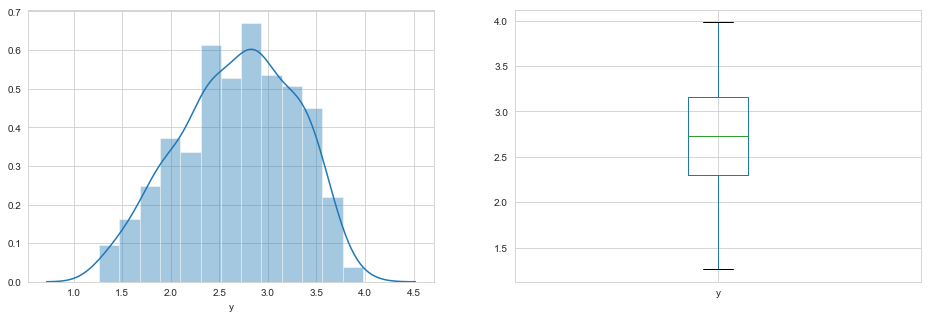

In [60]:
# Visualizing to see if there is still presence of Outliers

plt.figure(7)
plt.subplot(121)
sns.distplot(data_train['y'])

plt.subplot(122)
data_train['y'].plot.box(figsize=(16,5))

plt.show()

In [118]:
# Splitting the Dataset into independent and dependent features
X = data_train.drop('ID', axis=1)
X = X.drop('y', axis=1).values
y = data_train.y.values

In [559]:
X_data_test = data_test.drop('ID', axis=1).values

In [119]:
# Encoding the Categorical Features using OneHotEncoder in other to make
# the them numerical and to avoid relational other of classes of the categories

labelencoder_X = LabelEncoder()
X[:, 2] = labelencoder_X.fit_transform(X[:, 2])
X[:, 7] = labelencoder_X.fit_transform(X[:, 7])
onehotencoder = OneHotEncoder(categorical_features = [2])
X = onehotencoder.fit_transform(X).toarray()

C:\Users\training\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\training\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [561]:
labelencoder_X = LabelEncoder()
X_data_test[:, 2] = labelencoder_X.fit_transform(X_data_test[:, 2])
X_data_test[:, 7] = labelencoder_X.fit_transform(X_data_test[:, 7])
onehotencoder_data_test = OneHotEncoder(categorical_features = [2])
X_data_test = onehotencoder_data_test.fit_transform(X_data_test).toarray()

C:\Users\training\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\training\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [120]:
X

array([[0.        , 1.        , 0.        , ..., 0.92588617, 0.81268464,
        1.        ],
       [0.        , 0.        , 1.        , ..., 0.69844363, 0.65854484,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.5457217 , 0.83686302,
        0.        ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.34877148, 0.6248511 ,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.65806935, 0.40536676,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.53380236, 0.70728965,
        1.        ]])

In [562]:
X_data_test

array([[0.        , 1.        , 0.        , ..., 0.19019284, 0.49765088,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.64963124, 0.95222433,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.10525138, 0.27748882,
        1.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.33576716, 0.64013538,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.17024352, 0.40757844,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.60383708, 0.47435768,
        0.        ]])

In [121]:
y

array([3.70751388, 2.68924256, 2.8865082 , 2.47816823, 3.18266622,
       2.35489641, 2.89099464, 2.59436576, 3.64964075, 3.23938477,
       3.30033681, 2.90895904, 3.29721447, 2.33015616, 3.35133073,
       3.24318048, 2.72988466, 3.64470927, 2.30201417, 2.33474583,
       2.89128712, 3.3346807 , 2.8239073 , 3.20201377, 3.06894076,
       3.03103139, 3.41012517, 3.08399563, 1.77085872, 2.94243994,
       3.29545145, 2.37759024, 2.79237065, 3.11231954, 3.2329518 ,
       2.65517932, 2.34374802, 3.32665383, 2.88331682, 3.02010476,
       2.38414427, 2.22466203, 3.50173011, 3.38439218, 2.64743335,
       3.21149254, 2.77248432, 1.83773857, 2.15533725, 3.358189  ,
       3.58894458, 2.09103334, 2.70557521, 2.36399951, 3.66543655,
       3.10803029, 1.54305737, 2.07523349, 3.10272989, 1.94632813,
       2.82126251, 3.14125111, 2.72620023, 2.16113849, 3.15624591,
       3.06445212, 3.76074932, 2.00413546, 2.7054153 , 2.47449298,
       2.78449955, 2.42830722, 2.3027145 , 3.45260764, 2.84714

In [122]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,1.0,0.0,0.0,0.951786,0.669570,0.170130,0.623469,0.925886,0.812685,1.0
1,0.0,0.0,1.0,0.0,0.510447,0.922627,0.087899,0.025415,0.698444,0.658545,1.0
2,0.0,0.0,0.0,1.0,0.294838,0.351081,0.710892,0.699661,0.545722,0.836863,0.0
3,0.0,1.0,0.0,0.0,0.798645,0.572042,0.026137,0.609730,0.488668,0.342675,0.0
4,0.0,0.0,1.0,0.0,0.689666,0.395323,0.172448,0.736433,0.708408,0.695521,1.0
5,1.0,0.0,0.0,0.0,0.834692,0.268175,0.624388,0.697708,0.392404,0.571713,1.0
6,0.0,0.0,0.0,1.0,0.558480,0.540930,0.061879,0.361444,0.536288,0.542901,1.0
7,0.0,1.0,0.0,0.0,0.270433,0.025224,0.717872,0.265832,0.589349,0.347812,1.0
8,0.0,1.0,0.0,0.0,0.555350,0.585715,0.151772,0.917405,0.844082,0.337620,1.0
9,0.0,1.0,0.0,0.0,0.449391,0.988158,0.511197,0.059155,0.972969,0.584605,1.0


In [123]:
X = X[:, 1:] # Excluding one of the dummy variables created by the categorical
             # feature with 4 classes to avoid multicolinearity or dummy variable trap

In [566]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.951786,0.669570,0.170130,0.623469,0.925886,0.812685,1.0
1,0.0,1.0,0.0,0.510447,0.922627,0.087899,0.025415,0.698444,0.658545,1.0
2,0.0,0.0,1.0,0.294838,0.351081,0.710892,0.699661,0.545722,0.836863,0.0
3,1.0,0.0,0.0,0.798645,0.572042,0.026137,0.609730,0.488668,0.342675,0.0
4,0.0,1.0,0.0,0.689666,0.395323,0.172448,0.736433,0.708408,0.695521,1.0
5,0.0,0.0,0.0,0.834692,0.268175,0.624388,0.697708,0.392404,0.571713,1.0
6,0.0,0.0,1.0,0.558480,0.540930,0.061879,0.361444,0.536288,0.542901,1.0
7,1.0,0.0,0.0,0.270433,0.025224,0.717872,0.265832,0.589349,0.347812,1.0
8,1.0,0.0,0.0,0.555350,0.585715,0.151772,0.917405,0.844082,0.337620,1.0
9,1.0,0.0,0.0,0.449391,0.988158,0.511197,0.059155,0.972969,0.584605,1.0


In [563]:
X_data_test = X_data_test[:, 1:]

In [565]:
pd.DataFrame(X_data_test)

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.213254,0.707218,0.206151,0.010148,0.190193,0.497651,0.0
1,1.0,0.0,0.0,0.867987,0.494110,0.510344,0.922549,0.649631,0.952224,0.0
2,0.0,0.0,1.0,0.419168,0.579660,0.832660,0.351641,0.105251,0.277489,1.0
3,0.0,0.0,0.0,0.706512,0.948891,0.546916,0.771624,0.683572,0.311848,1.0
4,0.0,0.0,1.0,0.344634,0.942960,0.570995,0.315698,0.651284,0.677366,1.0
5,0.0,0.0,0.0,0.705707,0.559254,0.394597,0.645392,0.578195,0.609545,0.0
6,0.0,0.0,0.0,0.954670,0.249721,0.973839,0.713764,0.678933,0.837376,1.0
7,0.0,1.0,0.0,0.971844,0.626594,0.487489,0.130576,0.586681,0.049419,1.0
8,0.0,0.0,1.0,0.340954,0.945636,0.461561,0.433979,0.257564,0.314688,1.0
9,1.0,0.0,0.0,0.223310,0.523015,0.492258,0.968786,0.419971,0.544552,1.0


In [124]:
X

array([[1.        , 0.        , 0.        , ..., 0.92588617, 0.81268464,
        1.        ],
       [0.        , 1.        , 0.        , ..., 0.69844363, 0.65854484,
        1.        ],
       [0.        , 0.        , 1.        , ..., 0.5457217 , 0.83686302,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.34877148, 0.6248511 ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.65806935, 0.40536676,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.53380236, 0.70728965,
        1.        ]])

In [125]:
# Splitting the dataset into the Training and Test set for Model Building
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)

# Model Building

### Linear Regressor

In [126]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [413]:
linear_regressor.

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)>

In [127]:
y_pred_linear = linear_regressor.predict(X_valid)

In [128]:
y_pred_linear

array([3.22729719, 3.40485775, 3.21951797, 3.12536346, 3.11028329,
       2.54535969, 1.77696333, 2.99409505, 2.28264942, 3.24966707,
       2.43858784, 2.18639227, 1.76964371, 2.39594749, 2.26816286,
       2.84237048, 1.45339962, 3.3359446 , 3.59490999, 3.06810892,
       3.22722882, 2.11000978, 3.22981592, 2.28404261, 2.34718554,
       2.48110156, 2.52444524, 1.64968234, 3.64310444, 2.62282928,
       1.82240185, 2.85021882, 3.43965432, 2.80846394, 2.74302576,
       3.51924813, 2.58040679, 3.59469187, 2.77535801, 2.95532631,
       2.79949223, 3.61399257, 3.19719796, 1.82482614, 3.76234859,
       3.06124085, 2.86394512, 1.59779672, 2.23167212, 2.46720914,
       3.15776679, 2.63530608, 3.33759535, 2.82141182, 2.25813023,
       3.69662005, 1.91732994, 3.66521694, 1.85044581, 2.93650041,
       3.02428335, 3.08554113, 2.10910266, 2.36586647, 2.21233259,
       3.89068247, 2.59509392, 2.89581152, 2.62087854, 1.70296332,
       2.54617161, 2.62130883, 2.89371751, 2.64758664, 1.75728

In [129]:
y_valid

array([3.3201863 , 3.45260764, 3.36294984, 3.17288652, 3.10937409,
       2.51974898, 1.77674934, 3.10803029, 2.18940916, 3.23938477,
       2.4505284 , 2.22380229, 1.92929892, 2.39063445, 2.33421289,
       2.90905464, 1.51037935, 3.29545145, 3.62249437, 3.18801733,
       3.37204793, 2.05511197, 3.21519075, 2.3027145 , 2.16113849,
       2.41863739, 2.52071114, 1.66399553, 3.64932129, 2.7054153 ,
       1.73051182, 2.86286279, 3.55114184, 2.8865082 , 2.71844035,
       3.49678385, 2.62903649, 3.59665078, 2.82929157, 2.94297947,
       2.83589407, 3.43498205, 3.11231954, 2.00170372, 3.70751388,
       2.90895904, 2.89276133, 1.51985127, 2.28465953, 2.32928861,
       3.07557426, 2.55639385, 3.4248669 , 2.76176534, 2.30201417,
       3.7116279 , 1.79192485, 3.64669078, 1.90953864, 2.98935272,
       3.06444709, 3.02010476, 2.21805889, 2.41926576, 2.23745032,
       3.91712646, 2.76342079, 2.78449955, 2.69467097, 1.97610715,
       2.55331703, 2.63156003, 2.85508529, 2.47449298, 1.80774

### Building the Optimal Model using Backward Elimination

In [130]:
X_reshape = np.append(arr = np.ones((len(X), 1)).astype(int), values = X, axis = 1)

In [580]:
X_data_test_reshape = np.append(arr = np.ones((len(X_data_test), 1)).astype(int), values = X_data_test, axis = 1)

In [131]:
X_reshape

array([[1.        , 1.        , 0.        , ..., 0.92588617, 0.81268464,
        1.        ],
       [1.        , 0.        , 1.        , ..., 0.69844363, 0.65854484,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.5457217 , 0.83686302,
        0.        ],
       ...,
       [1.        , 1.        , 0.        , ..., 0.34877148, 0.6248511 ,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.65806935, 0.40536676,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.53380236, 0.70728965,
        1.        ]])

In [581]:
X_data_test_reshape

array([[1.        , 1.        , 0.        , ..., 0.19019284, 0.49765088,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.64963124, 0.95222433,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.10525138, 0.27748882,
        1.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.33576716, 0.64013538,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.17024352, 0.40757844,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.60383708, 0.47435768,
        0.        ]])

In [132]:
pd.DataFrame(X_reshape)

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,1.0,0.0,0.0,0.951786,0.669570,0.170130,0.623469,0.925886,0.812685,1.0
1,1.0,0.0,1.0,0.0,0.510447,0.922627,0.087899,0.025415,0.698444,0.658545,1.0
2,1.0,0.0,0.0,1.0,0.294838,0.351081,0.710892,0.699661,0.545722,0.836863,0.0
3,1.0,1.0,0.0,0.0,0.798645,0.572042,0.026137,0.609730,0.488668,0.342675,0.0
4,1.0,0.0,1.0,0.0,0.689666,0.395323,0.172448,0.736433,0.708408,0.695521,1.0
5,1.0,0.0,0.0,0.0,0.834692,0.268175,0.624388,0.697708,0.392404,0.571713,1.0
6,1.0,0.0,0.0,1.0,0.558480,0.540930,0.061879,0.361444,0.536288,0.542901,1.0
7,1.0,1.0,0.0,0.0,0.270433,0.025224,0.717872,0.265832,0.589349,0.347812,1.0
8,1.0,1.0,0.0,0.0,0.555350,0.585715,0.151772,0.917405,0.844082,0.337620,1.0
9,1.0,1.0,0.0,0.0,0.449391,0.988158,0.511197,0.059155,0.972969,0.584605,1.0


### Picking an Alpha (Level of Significance) of 0.05

In [133]:
X_opt = X_reshape[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]

In [134]:
linear_regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()

In [135]:
linear_regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     1746.
Date:                Sun, 02 Feb 2020   Prob (F-statistic):               0.00
Time:                        15:54:14   Log-Likelihood:                 456.75
No. Observations:                 499   AIC:                            -891.5
Df Residuals:                     488   BIC:                            -845.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2625      0.023     11.332      0.000       0.217       0.308
x1             0.9017      0.013     71.776      0.000       0.877       0.926
x2             0.5641      0.013     44.085      0.000       0.539       0.589
x3             0.8773      0.012     71.153      0.000       0.853       0.902
x4            -0.0077      0.015     -0.510      0.610      -0.037       0.022
x5             0.3909      0.015     25.774      0.000       0.361       0.421
x6             0.0009      0.016      0.056      0.955      -0.030       0.031
x7             0.9505      0.016     57.922      0.000       0.918       0.983
x8             0.6710      0.015     44.333      0.000       0.641       0.701
x9             0.6039      0.016     38.958      0.000       0.573       0.634
x10            0.6326      0.011     58.861      0.000       0.611       0.654
==============================================================================
Omnibus:                        5.014   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.082   Jarque-Bera (JB):                4.801
Skew:                          -0.226   Prob(JB):                       0.0907
Kurtosis:                       3.163   Cond. No.                         11.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [178]:
# Removing the variable with the highest p-value (That is greater than 0.05)
# Which is x6
X_opt = X_reshape[:, [0, 1, 2, 3, 4, 5, 7, 8, 9, 10]]

In [179]:
linear_regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()

In [180]:
linear_regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     1944.
Date:                Sun, 02 Feb 2020   Prob (F-statistic):               0.00
Time:                        16:41:22   Log-Likelihood:                 456.75
No. Observations:                 499   AIC:                            -893.5
Df Residuals:                     489   BIC:                            -851.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2630      0.022     12.175      0.000       0.221       0.305
x1             0.9017      0.013     72.069      0.000       0.877       0.926
x2             0.5640      0.013     44.313      0.000       0.539       0.589
x3             0.8773      0.012     71.272      0.000       0.853       0.901
x4            -0.0077      0.015     -0.511      0.610      -0.037       0.022
x5             0.3909      0.015     25.821      0.000       0.361       0.421
x6             0.9505      0.016     57.982      0.000       0.918       0.983
x7             0.6710      0.015     44.379      0.000       0.641       0.701
x8             0.6039      0.015     39.001      0.000       0.573       0.634
x9             0.6326      0.011     58.922      0.000       0.612       0.654
==============================================================================
Omnibus:                        5.005   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.082   Jarque-Bera (JB):                4.791
Skew:                          -0.226   Prob(JB):                       0.0911
Kurtosis:                       3.163   Cond. No.                         10.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
linear_regressor_OLS.rsquared_adj

0.9723164570209683

In [411]:
linear_regressor_OLS.rsquared

0.9728167620145652

In [153]:
# Removing the variable with the next highest p-value (That is greater than 0.05)
# Which is x4
X_opt = X_reshape[:, [0, 1, 2, 3, 5, 7, 8, 9, 10]]

In [582]:
X_data_test_opt = X_data_test_reshape[:, [0, 1, 2, 3, 5, 7, 8, 9, 10]]

In [154]:
linear_regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()

In [155]:
linear_regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     2191.
Date:                Sun, 02 Feb 2020   Prob (F-statistic):               0.00
Time:                        16:15:26   Log-Likelihood:                 456.62
No. Observations:                 499   AIC:                            -895.2
Df Residuals:                     490   BIC:                            -857.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2591      0.020     12.818      0.000       0.219       0.299
x1             0.9017      0.013     72.125      0.000       0.877       0.926
x2             0.5641      0.013     44.354      0.000       0.539       0.589
x3             0.8771      0.012     71.352      0.000       0.853       0.901
x4             0.3915      0.015     25.955      0.000       0.362       0.421
x5             0.9503      0.016     58.035      0.000       0.918       0.982
x6             0.6706      0.015     44.441      0.000       0.641       0.700
x7             0.6039      0.015     39.029      0.000       0.573       0.634
x8             0.6327      0.011     59.001      0.000       0.612       0.654
==============================================================================
Omnibus:                        4.998   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.082   Jarque-Bera (JB):                4.783
Skew:                          -0.224   Prob(JB):                       0.0915
Kurtosis:                       3.170   Cond. No.                         10.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
linear_regressor_OLS.rsquared_adj

0.9723582083307972

# Note: Since the Adjusted R-Squared increased after removing x4, then we can clear our doubt about if removing x4 will be dangerous because it is quite close to 0.05. Thus we can remove x4.

### Building the Optimal Regressor Model with the Features left from Backward Elimination

In [143]:
pd.DataFrame(X_opt)

,0,1,2,3,4,5,6,7,8
0,1.0,1.0,0.0,0.0,0.669570,0.623469,0.925886,0.812685,1.0
1,1.0,0.0,1.0,0.0,0.922627,0.025415,0.698444,0.658545,1.0
2,1.0,0.0,0.0,1.0,0.351081,0.699661,0.545722,0.836863,0.0
3,1.0,1.0,0.0,0.0,0.572042,0.609730,0.488668,0.342675,0.0
4,1.0,0.0,1.0,0.0,0.395323,0.736433,0.708408,0.695521,1.0
5,1.0,0.0,0.0,0.0,0.268175,0.697708,0.392404,0.571713,1.0
6,1.0,0.0,0.0,1.0,0.540930,0.361444,0.536288,0.542901,1.0
7,1.0,1.0,0.0,0.0,0.025224,0.265832,0.589349,0.347812,1.0
8,1.0,1.0,0.0,0.0,0.585715,0.917405,0.844082,0.337620,1.0
9,1.0,1.0,0.0,0.0,0.988158,0.059155,0.972969,0.584605,1.0


In [168]:
# Splitting the dataset into the Training and Test set for the Optimal Model Building
X_train_opt, X_valid_opt, y_train_opt, y_valid_opt = train_test_split(X_opt, y, test_size=0.20, random_state=42)

In [169]:
linear_regressor_opt = LinearRegression()
linear_regressor_opt.fit(X_train_opt, y_train_opt)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [170]:
y_pred_linear_opt = linear_regressor_opt.predict(X_valid_opt)

In [171]:
y_pred_linear_opt

array([3.21860823, 3.410132  , 3.2216855 , 3.12558795, 3.10960799,
       2.54787948, 1.77289351, 3.00104758, 2.27916215, 3.24934773,
       2.44102072, 2.18432994, 1.7737136 , 2.39724823, 2.27162926,
       2.84561932, 1.45565582, 3.33702045, 3.59605718, 3.06947086,
       3.22697576, 2.11030175, 3.23033255, 2.2748091 , 2.34570853,
       2.48214444, 2.52773123, 1.65053275, 3.64877753, 2.63134517,
       1.81570485, 2.85384836, 3.43648056, 2.80666002, 2.73511247,
       3.51019608, 2.57708067, 3.59267942, 2.76909974, 2.955898  ,
       2.794748  , 3.60625378, 3.19350507, 1.82922131, 3.76491261,
       3.05311662, 2.86212177, 1.60146871, 2.23835352, 2.47099311,
       3.15841452, 2.63874854, 3.33925409, 2.82243287, 2.25675067,
       3.70072425, 1.9165706 , 3.66422234, 1.85175967, 2.92815091,
       3.02322813, 3.07730806, 2.10244056, 2.36722303, 2.21443719,
       3.8845434 , 2.60268858, 2.88411532, 2.61920412, 1.69546306,
       2.5436807 , 2.62343648, 2.89256689, 2.64740105, 1.75248

In [232]:
y_valid_opt

array([3.3201863 , 3.45260764, 3.36294984, 3.17288652, 3.10937409,
       2.51974898, 1.77674934, 3.10803029, 2.18940916, 3.23938477,
       2.4505284 , 2.22380229, 1.92929892, 2.39063445, 2.33421289,
       2.90905464, 1.51037935, 3.29545145, 3.62249437, 3.18801733,
       3.37204793, 2.05511197, 3.21519075, 2.3027145 , 2.16113849,
       2.41863739, 2.52071114, 1.66399553, 3.64932129, 2.7054153 ,
       1.73051182, 2.86286279, 3.55114184, 2.8865082 , 2.71844035,
       3.49678385, 2.62903649, 3.59665078, 2.82929157, 2.94297947,
       2.83589407, 3.43498205, 3.11231954, 2.00170372, 3.70751388,
       2.90895904, 2.89276133, 1.51985127, 2.28465953, 2.32928861,
       3.07557426, 2.55639385, 3.4248669 , 2.76176534, 2.30201417,
       3.7116279 , 1.79192485, 3.64669078, 1.90953864, 2.98935272,
       3.06444709, 3.02010476, 2.21805889, 2.41926576, 2.23745032,
       3.91712646, 2.76342079, 2.78449955, 2.69467097, 1.97610715,
       2.55331703, 2.63156003, 2.85508529, 2.47449298, 1.80774

In [173]:
linear_regressor_opt.predict(X_train_opt)

array([1.69344871, 2.23855606, 2.68540122, 2.76079634, 2.46340845,
       3.16938565, 2.30921315, 1.94156836, 3.05149226, 2.4326903 ,
       2.92176566, 2.54545264, 2.52296641, 3.51626414, 3.33557983,
       3.34918029, 2.76779624, 2.49259446, 3.02090529, 3.17507561,
       2.43098973, 2.93401222, 3.00673648, 2.90633172, 1.96311024,
       2.66683751, 2.43347674, 1.4778877 , 3.1461131 , 3.12441922,
       3.38553341, 2.04187584, 3.52129292, 3.16302918, 3.72802845,
       2.23651702, 3.7558092 , 1.93604822, 3.20437181, 1.81696877,
       2.47813113, 2.67246934, 3.19673018, 1.34148706, 2.25619986,
       3.03701097, 2.26390689, 2.22447411, 3.19335435, 2.88454148,
       2.35878911, 1.56851423, 2.49671058, 2.98021362, 2.55742364,
       2.90193679, 2.88191876, 3.59097114, 2.87294939, 2.93853513,
       3.28232588, 2.60846281, 3.52294324, 2.65925428, 2.84445335,
       2.87493857, 3.39551638, 2.78564248, 2.08958863, 2.82219974,
       2.78758068, 2.66413749, 2.08294637, 3.09073715, 2.08523

In [174]:
y_train_opt

array([1.54305737, 2.1072374 , 2.76699224, 2.59745304, 2.55570185,
       3.36010648, 2.36298307, 1.81647246, 3.03103139, 2.43789228,
       2.93326269, 2.52939788, 2.36785453, 3.50173011, 3.26311226,
       3.46143444, 2.74493887, 2.47467421, 2.99950048, 3.19175522,
       2.48331607, 2.97827718, 3.04079774, 2.8239073 , 2.03253096,
       2.77248432, 2.37759024, 1.61445738, 3.01722947, 3.07932871,
       3.55864922, 2.07523349, 3.46596404, 3.06894076, 3.64470927,
       2.23165027, 3.76074932, 2.01285703, 3.19137281, 1.73942512,
       2.61831258, 2.3475148 , 3.20201377, 1.35632575, 2.12885163,
       3.03443335, 2.35489641, 2.27792979, 3.21149254, 2.72988466,
       2.40087895, 1.38745782, 2.47816823, 3.11050563, 2.53275385,
       2.82126251, 3.10273892, 3.56222631, 2.96588112, 2.94243994,
       3.51168783, 2.66194611, 3.41012517, 2.59436576, 2.96284577,
       2.89790743, 3.32665383, 3.00027927, 2.30959483, 2.79188784,
       2.71267797, 2.75871156, 2.22385997, 3.07921907, 2.08809

In [233]:
r2_score(y_valid_opt, y_pred_linear_opt)

0.9749254664717284

In [414]:
accuracies_lin_reg_opt = cross_val_score(estimator = linear_regressor_opt, X = X_train, y = y_train, cv = 10)

In [415]:
accuracies_lin_reg_opt

array([0.97584607, 0.94654836, 0.9773747 , 0.96904539, 0.96640369,
       0.96734972, 0.9691638 , 0.97274875, 0.97918193, 0.97009056])

### Compared

In [416]:
accuracies_lin_reg_opt.mean()

0.9693752980842552

In [417]:
accuracies_lin_reg_opt.std()

0.008649158364562447

In [418]:
print('meaning accuracy is between ', accuracies_lin_reg_opt.mean() - accuracies_lin_reg_opt.std(), 'and', accuracies_lin_reg_opt.mean() + accuracies_lin_reg_opt.std())

meaning accuracy is between  0.9607261397196927 and 0.9780244564488176


## Support Vector Regressor (SVR)

In [527]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train_opt)
X_valid_scaled = sc_X.transform(X_valid_opt)
y_train_scaled = sc_y.fit_transform(y_train_opt.reshape(len(y_train), 1))
y_valid_scaled = sc_y.transform(y_valid_opt.reshape(len(y_valid), 1))

In [583]:
X_data_test_opt_scaled = sc_X.transform(X_data_test_opt)

In [528]:
y_train_scaled

array([[-1.96023244],
       [-0.99876028],
       [ 0.12558986],
       [-0.1633378 ],
       [-0.23448992],
       [ 1.13637151],
       [-0.56292008],
       [-1.49428012],
       [ 0.57556377],
       [-0.43526026],
       [ 0.40894694],
       [-0.27931699],
       [-0.55461817],
       [ 1.37772564],
       [ 0.97107456],
       [ 1.309054  ],
       [ 0.08800664],
       [-0.37257673],
       [ 0.52182897],
       [ 0.84946832],
       [-0.35784932],
       [ 0.48566035],
       [ 0.59220751],
       [ 0.22258416],
       [-1.12607455],
       [ 0.13494943],
       [-0.53802663],
       [-1.83855297],
       [ 0.55204262],
       [ 0.65787175],
       [ 1.47472683],
       [-1.05330115],
       [ 1.31677331],
       [ 0.64016868],
       [ 1.62138984],
       [-0.78673664],
       [ 1.81914458],
       [-1.15960274],
       [ 0.84881663],
       [-1.62558372],
       [-0.1277891 ],
       [-0.58928101],
       [ 0.86695089],
       [-2.27845932],
       [-0.96192545],
       [ 0

In [529]:
y_valid_scaled

array([[ 1.06833979],
       [ 1.29401141],
       [ 1.14121715],
       [ 0.81731241],
       [ 0.70907492],
       [-0.29576058],
       [-1.56197602],
       [ 0.70678482],
       [-0.85872367],
       [ 0.93063832],
       [-0.41372588],
       [-0.80011112],
       [-1.30200196],
       [-0.51579678],
       [-0.61195005],
       [ 0.36769173],
       [-2.01592212],
       [ 1.02618681],
       [ 1.58353135],
       [ 0.84309824],
       [ 1.15672205],
       [-1.08759212],
       [ 0.88940701],
       [-0.66562942],
       [-0.90690238],
       [-0.46807433],
       [-0.29412088],
       [-1.75413036],
       [ 1.62924961],
       [ 0.02065082],
       [-1.6407737 ],
       [ 0.28897187],
       [ 1.46193279],
       [ 0.32926823],
       [ 0.04284804],
       [ 1.36929624],
       [-0.10951348],
       [ 1.53948885],
       [ 0.23175999],
       [ 0.42550622],
       [ 0.24301194],
       [ 1.26397399],
       [ 0.71409452],
       [-1.17861015],
       [ 1.72842107],
       [ 0

In [530]:
svr_regressor = SVR(kernel = 'linear')
svr_regressor.fit(X_train_scaled, y_train_scaled)

C:\Users\training\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [531]:
y_pred_svr = svr_regressor.predict(X_valid_scaled)

In [532]:
y_pred_svr

array([ 0.91052403,  1.22943158,  0.89177767,  0.72727454,  0.70185344,
       -0.25050634, -1.57092712,  0.51495935, -0.69349104,  0.93259667,
       -0.42764847, -0.86740275, -1.56344199, -0.51851649, -0.70645982,
        0.25835506, -2.09490691,  1.09335362,  1.53999436,  0.64227704,
        0.89868186, -0.97599678,  0.90089037, -0.70920505, -0.58814095,
       -0.37985724, -0.27857122, -1.77993811,  1.62818421, -0.11012678,
       -1.48219272,  0.28074813,  1.26401625,  0.20036754,  0.06559835,
        1.3789322 , -0.20276294,  1.52911332,  0.12612766,  0.45310715,
        0.18183979,  1.54019795,  0.84930857, -1.44042367,  1.82023537,
        0.61382282,  0.28442991, -1.84732068, -0.76055836, -0.38429853,
        0.81685039, -0.08742667,  1.10288608,  0.21640655, -0.74203005,
        1.70502164, -1.32231114,  1.64181324, -1.44476865,  0.38876185,
        0.54702896,  0.66369162, -0.98705761, -0.54297597, -0.82900708,
        2.02577266, -0.13896157,  0.33108548, -0.11382169, -1.68

In [533]:
y_valid_scaled

array([[ 1.06833979],
       [ 1.29401141],
       [ 1.14121715],
       [ 0.81731241],
       [ 0.70907492],
       [-0.29576058],
       [-1.56197602],
       [ 0.70678482],
       [-0.85872367],
       [ 0.93063832],
       [-0.41372588],
       [-0.80011112],
       [-1.30200196],
       [-0.51579678],
       [-0.61195005],
       [ 0.36769173],
       [-2.01592212],
       [ 1.02618681],
       [ 1.58353135],
       [ 0.84309824],
       [ 1.15672205],
       [-1.08759212],
       [ 0.88940701],
       [-0.66562942],
       [-0.90690238],
       [-0.46807433],
       [-0.29412088],
       [-1.75413036],
       [ 1.62924961],
       [ 0.02065082],
       [-1.6407737 ],
       [ 0.28897187],
       [ 1.46193279],
       [ 0.32926823],
       [ 0.04284804],
       [ 1.36929624],
       [-0.10951348],
       [ 1.53948885],
       [ 0.23175999],
       [ 0.42550622],
       [ 0.24301194],
       [ 1.26397399],
       [ 0.71409452],
       [-1.17861015],
       [ 1.72842107],
       [ 0

In [534]:
svr_regressor.score(X_valid_scaled,y_valid_scaled)

0.9752709013361763

In [535]:
r2_score(y_valid_scaled, y_pred_svr)

0.9752709013361763

In [536]:
y_pred_svr_inverse_transf = sc_y.inverse_transform(svr_regressor.predict(X_valid_scaled))

In [537]:
y_pred_svr_inverse_transf

array([3.22758196, 3.41471298, 3.21658182, 3.12005341, 3.10513662,
       2.54630361, 1.77149694, 2.99546947, 2.28636564, 3.24053391,
       2.44235879, 2.18431639, 1.77588913, 2.38903855, 2.27875572,
       2.84489722, 1.46403204, 3.33486411, 3.5969474 , 3.07017792,
       3.22063311, 2.12059475, 3.22192904, 2.27714485, 2.34818378,
       2.4704021 , 2.52983549, 1.64885186, 3.64869613, 2.62867661,
       1.82356519, 2.8580372 , 3.43500684, 2.81087086, 2.73178996,
       3.50243811, 2.57431886, 3.59056255, 2.76730781, 2.95917535,
       2.799999  , 3.59706687, 3.19166148, 1.84807476, 3.76138938,
       3.05348133, 2.86019763, 1.6093126 , 2.24701136, 2.467796  ,
       3.17261542, 2.64199676, 3.34045764, 2.82028236, 2.25788354,
       3.69378338, 1.91738174, 3.65669347, 1.84552518, 2.92141833,
       3.01428752, 3.08274374, 2.11410439, 2.37468603, 2.2068465 ,
       3.88199614, 2.61175671, 2.88757454, 2.62650848, 1.70264627,
       2.53910087, 2.630672  , 2.89135447, 2.64711875, 1.75838

In [538]:
y_valid

array([3.3201863 , 3.45260764, 3.36294984, 3.17288652, 3.10937409,
       2.51974898, 1.77674934, 3.10803029, 2.18940916, 3.23938477,
       2.4505284 , 2.22380229, 1.92929892, 2.39063445, 2.33421289,
       2.90905464, 1.51037935, 3.29545145, 3.62249437, 3.18801733,
       3.37204793, 2.05511197, 3.21519075, 2.3027145 , 2.16113849,
       2.41863739, 2.52071114, 1.66399553, 3.64932129, 2.7054153 ,
       1.73051182, 2.86286279, 3.55114184, 2.8865082 , 2.71844035,
       3.49678385, 2.62903649, 3.59665078, 2.82929157, 2.94297947,
       2.83589407, 3.43498205, 3.11231954, 2.00170372, 3.70751388,
       2.90895904, 2.89276133, 1.51985127, 2.28465953, 2.32928861,
       3.07557426, 2.55639385, 3.4248669 , 2.76176534, 2.30201417,
       3.7116279 , 1.79192485, 3.64669078, 1.90953864, 2.98935272,
       3.06444709, 3.02010476, 2.21805889, 2.41926576, 2.23745032,
       3.91712646, 2.76342079, 2.78449955, 2.69467097, 1.97610715,
       2.55331703, 2.63156003, 2.85508529, 2.47449298, 1.80774

In [539]:
# k-Fold Cross Validation
accuracies_svr = cross_val_score(estimator = svr_regressor, X = X_train_scaled, y = y_train_scaled , cv = 10, n_jobs = -1)

In [540]:
accuracies_svr

array([0.97593474, 0.94557783, 0.9770535 , 0.96961424, 0.96750786,
       0.96763851, 0.96957441, 0.97484193, 0.97942292, 0.97032058])

In [541]:
accuracies_svr.mean()

0.9697486538358108

In [542]:
accuracies_svr.std()

0.008973513102859433

In [543]:
print('meaning accuracy is between ', accuracies_svr.mean() - accuracies_svr.std(), 'and', accuracies_svr.mean() + accuracies_svr.std())

meaning accuracy is between  0.9607751407329513 and 0.9787221669386702


In [544]:
# Hyper-Parameter Tuning for Best Model Using GridSearchCV
parameters_svr =  [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
               {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma':[0.5, 0.1, 0.01, 0.001]}]
grid_search_svr = GridSearchCV(estimator = svr_regressor, 
                              param_grid = parameters_svr,
                              scoring = 'r2',
                              cv = 10,
                              n_jobs = -1) # Remove later, dataset not so large
grid_search_svr = grid_search_svr.fit(X_train_scaled, y_train_scaled)

C:\Users\training\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\training\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [545]:
best_accuracy_svr = grid_search_svr.best_score_

In [546]:
best_accuracy_svr

0.9697472204254822

In [547]:
best_parameters_svr = grid_search_svr.best_params_

In [548]:
best_parameters_svr

{'C': 1, 'kernel': 'linear'}

## Random Forest Regressor

In [549]:
random_forest_regressor = RandomForestRegressor(n_estimators = 500, random_state = 42)
random_forest_regressor.fit(X_train_opt, y_train_opt)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [551]:
y_pred_random_forest = random_forest_regressor.predict(X_valid_opt)

In [552]:
y_pred_random_forest

array([3.22737035, 3.24336368, 2.93827765, 2.97374146, 3.04079957,
       2.63892656, 1.84160224, 2.95472166, 2.20795206, 3.09528479,
       2.29042137, 2.46266897, 1.71573603, 2.52145632, 2.33862221,
       2.92608047, 1.96222821, 3.278767  , 3.4313377 , 2.90864951,
       3.02619453, 2.19561018, 3.23795281, 2.19384951, 2.3937306 ,
       2.3022691 , 2.4040398 , 1.81846358, 3.52126459, 2.80204105,
       2.02626172, 2.72934492, 3.43956822, 2.77827212, 2.72047667,
       3.40646882, 2.48448066, 3.44481623, 2.8570081 , 2.83524425,
       2.76893033, 3.3874366 , 3.15101813, 1.65601017, 3.42868119,
       2.97626485, 2.83650657, 1.94093407, 2.56943018, 2.63451378,
       3.15998555, 2.53164233, 3.30428424, 2.78337582, 2.25759733,
       3.28848502, 2.49220006, 3.47198661, 1.87397036, 2.9113282 ,
       3.03896024, 2.93873127, 2.70868419, 2.4255265 , 2.34415854,
       3.58957276, 2.62019197, 2.69162513, 2.58977025, 1.99032104,
       2.51208614, 2.30172969, 2.61988476, 2.60469728, 1.77951

In [553]:
y_valid

array([3.3201863 , 3.45260764, 3.36294984, 3.17288652, 3.10937409,
       2.51974898, 1.77674934, 3.10803029, 2.18940916, 3.23938477,
       2.4505284 , 2.22380229, 1.92929892, 2.39063445, 2.33421289,
       2.90905464, 1.51037935, 3.29545145, 3.62249437, 3.18801733,
       3.37204793, 2.05511197, 3.21519075, 2.3027145 , 2.16113849,
       2.41863739, 2.52071114, 1.66399553, 3.64932129, 2.7054153 ,
       1.73051182, 2.86286279, 3.55114184, 2.8865082 , 2.71844035,
       3.49678385, 2.62903649, 3.59665078, 2.82929157, 2.94297947,
       2.83589407, 3.43498205, 3.11231954, 2.00170372, 3.70751388,
       2.90895904, 2.89276133, 1.51985127, 2.28465953, 2.32928861,
       3.07557426, 2.55639385, 3.4248669 , 2.76176534, 2.30201417,
       3.7116279 , 1.79192485, 3.64669078, 1.90953864, 2.98935272,
       3.06444709, 3.02010476, 2.21805889, 2.41926576, 2.23745032,
       3.91712646, 2.76342079, 2.78449955, 2.69467097, 1.97610715,
       2.55331703, 2.63156003, 2.85508529, 2.47449298, 1.80774

In [554]:
r2_score(y_valid, y_pred_random_forest)

0.870135473429684

## Lasso Regression

In [472]:
lasso = Lasso()
parameters_lasso = {'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
grid_search_lasso = GridSearchCV(estimator = lasso, 
                              param_grid = parameters_lasso,
                              scoring = 'r2',
                              cv = 10,
                              n_jobs = -1) # Remove later, dataset not so large
grid_search_lasso = grid_search_lasso.fit(X_train_opt, y_train_opt)

In [473]:
grid_search_lasso.best_params_

{'alpha': 1e-08}

In [474]:
grid_search_lasso.best_score_

0.9696090240473968

In [476]:
grid_search_lasso.predict(X_valid_opt)

array([3.2186081 , 3.4101319 , 3.22168542, 3.12558787, 3.10960792,
       2.54787945, 1.77289365, 3.00104755, 2.2791622 , 3.24934762,
       2.44102075, 2.18433007, 1.77371373, 2.39724831, 2.2716293 ,
       2.84561931, 1.45565603, 3.33702035, 3.59605703, 3.06947084,
       3.22697567, 2.11030184, 3.23033246, 2.27480916, 2.34570865,
       2.48214448, 2.52773123, 1.6505329 , 3.64877738, 2.6313452 ,
       1.81570506, 2.8538483 , 3.43648045, 2.80665998, 2.73511247,
       3.51019594, 2.57708065, 3.59267927, 2.76909967, 2.9558979 ,
       2.79474803, 3.60625363, 3.19350502, 1.8292214 , 3.76491242,
       3.05311657, 2.86212178, 1.60146889, 2.23835358, 2.47099318,
       3.15841442, 2.6387485 , 3.33925391, 2.82243286, 2.2567507 ,
       3.70072407, 1.91657071, 3.66422217, 1.85175978, 2.92815087,
       3.02322808, 3.07730803, 2.10244066, 2.36722315, 2.21443729,
       3.8845432 , 2.60268858, 2.88411526, 2.61920411, 1.69546328,
       2.54368073, 2.62343638, 2.89256681, 2.64740108, 1.75248

In [478]:
y_valid

array([3.3201863 , 3.45260764, 3.36294984, 3.17288652, 3.10937409,
       2.51974898, 1.77674934, 3.10803029, 2.18940916, 3.23938477,
       2.4505284 , 2.22380229, 1.92929892, 2.39063445, 2.33421289,
       2.90905464, 1.51037935, 3.29545145, 3.62249437, 3.18801733,
       3.37204793, 2.05511197, 3.21519075, 2.3027145 , 2.16113849,
       2.41863739, 2.52071114, 1.66399553, 3.64932129, 2.7054153 ,
       1.73051182, 2.86286279, 3.55114184, 2.8865082 , 2.71844035,
       3.49678385, 2.62903649, 3.59665078, 2.82929157, 2.94297947,
       2.83589407, 3.43498205, 3.11231954, 2.00170372, 3.70751388,
       2.90895904, 2.89276133, 1.51985127, 2.28465953, 2.32928861,
       3.07557426, 2.55639385, 3.4248669 , 2.76176534, 2.30201417,
       3.7116279 , 1.79192485, 3.64669078, 1.90953864, 2.98935272,
       3.06444709, 3.02010476, 2.21805889, 2.41926576, 2.23745032,
       3.91712646, 2.76342079, 2.78449955, 2.69467097, 1.97610715,
       2.55331703, 2.63156003, 2.85508529, 2.47449298, 1.80774

In [498]:
lasso_opt = Lasso(alpha = 1e-08)
# k-Fold Cross Validation
accuracies_lasso = cross_val_score(estimator = lasso_opt, X = X_train_opt, y = y_train_opt , cv = 10, n_jobs = -1)

In [499]:
accuracies_lasso

array([0.9760798 , 0.94621782, 0.97735208, 0.96901027, 0.96789331,
       0.96740259, 0.96935718, 0.97284002, 0.97941616, 0.97054439])

In [500]:
accuracies_lasso.mean()

0.96961136246085

In [501]:
accuracies_lasso.std()

0.008744726332861046

In [502]:
print('meaning accuracy is between ', accuracies_lasso.mean() - accuracies_lasso.std(), 'and', accuracies_lasso.mean() + accuracies_lasso.std())

meaning accuracy is between  0.960866636127989 and 0.978356088793711


## Ridge Regression

In [484]:
ridge = Ridge()
parameters_ridge = {'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
grid_search_ridge = GridSearchCV(estimator = ridge, 
                              param_grid = parameters_ridge,
                              scoring = 'r2',
                              cv = 10,
                              n_jobs = -1) # Remove later, dataset not so large
grid_search_ridge = grid_search_ridge.fit(X_train_opt, y_train_opt)

In [485]:
ridge.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])

In [486]:
best_parameters_ridge = grid_search_ridge.best_params_

In [487]:
best_parameters_ridge

{'alpha': 0.01}

In [488]:
best_accuracy_ridge = grid_search_ridge.best_score_

In [489]:
best_accuracy_ridge

0.9696097242603364

In [491]:
grid_search_ridge.predict(X_valid_opt)

array([3.21837521, 3.40989916, 3.22153168, 3.12544206, 3.10950722,
       2.54786229, 1.77314535, 3.00102427, 2.27925868, 3.24921688,
       2.44102032, 2.18458563, 1.77398489, 2.39740414, 2.27171665,
       2.84560567, 1.45606824, 3.33687628, 3.5957885 , 3.06935614,
       3.22680087, 2.110455  , 3.23020516, 2.27488308, 2.34589909,
       2.4822445 , 2.5277354 , 1.65079602, 3.64846151, 2.63142019,
       1.81606302, 2.85368519, 3.43628567, 2.80655136, 2.73514578,
       3.50996805, 2.57701343, 3.59237484, 2.76903252, 2.95580308,
       2.79473832, 3.60597758, 3.19336069, 1.82933114, 3.76458352,
       3.05300129, 2.86209751, 1.60179292, 2.23843635, 2.4711572 ,
       3.15819873, 2.6387483 , 3.33900993, 2.82243701, 2.25685033,
       3.7004176 , 1.91679302, 3.66392686, 1.85196725, 2.92812646,
       3.02314576, 3.07719733, 2.10259526, 2.36740117, 2.21471054,
       3.88415911, 2.60262707, 2.88400256, 2.61913735, 1.69589045,
       2.54383353, 2.62328871, 2.89240443, 2.64752431, 1.75271

In [492]:
y_valid

array([3.3201863 , 3.45260764, 3.36294984, 3.17288652, 3.10937409,
       2.51974898, 1.77674934, 3.10803029, 2.18940916, 3.23938477,
       2.4505284 , 2.22380229, 1.92929892, 2.39063445, 2.33421289,
       2.90905464, 1.51037935, 3.29545145, 3.62249437, 3.18801733,
       3.37204793, 2.05511197, 3.21519075, 2.3027145 , 2.16113849,
       2.41863739, 2.52071114, 1.66399553, 3.64932129, 2.7054153 ,
       1.73051182, 2.86286279, 3.55114184, 2.8865082 , 2.71844035,
       3.49678385, 2.62903649, 3.59665078, 2.82929157, 2.94297947,
       2.83589407, 3.43498205, 3.11231954, 2.00170372, 3.70751388,
       2.90895904, 2.89276133, 1.51985127, 2.28465953, 2.32928861,
       3.07557426, 2.55639385, 3.4248669 , 2.76176534, 2.30201417,
       3.7116279 , 1.79192485, 3.64669078, 1.90953864, 2.98935272,
       3.06444709, 3.02010476, 2.21805889, 2.41926576, 2.23745032,
       3.91712646, 2.76342079, 2.78449955, 2.69467097, 1.97610715,
       2.55331703, 2.63156003, 2.85508529, 2.47449298, 1.80774

In [493]:
ridge_opt = Ridge(alpha = 0.01)
# k-Fold Cross Validation
accuracies_ridge = cross_val_score(estimator = ridge_opt, X = X_train_opt, y = y_train_opt , cv = 10, n_jobs = -1)

In [494]:
accuracies_ridge

array([0.97608051, 0.94621547, 0.97732649, 0.96900353, 0.96788631,
       0.96741879, 0.96938226, 0.97286273, 0.97938985, 0.97055493])

In [495]:
accuracies_ridge.mean()

0.969612087273506

In [496]:
accuracies_ridge.std()

0.00874086184127964

In [497]:
print('meaning accuracy is between ', accuracies_ridge.mean() - accuracies_ridge.std(), 'and', accuracies_ridge.mean() + accuracies_ridge.std())

meaning accuracy is between  0.9608712254322264 and 0.9783529491147857


## XGB Regressor

In [504]:
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train, y_train)
model_xgb.score(X_valid,y_valid)

[23:06:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9323044703229315

In [303]:
model_xgb.predict(X_valid)

array([3.2493136, 3.2410545, 3.040483 , 3.0396633, 3.025612 , 2.5228882,
       1.8228354, 2.99437  , 2.3285227, 3.0819402, 2.544199 , 2.2703533,
       1.5406955, 2.492587 , 2.3478677, 2.8666728, 1.5678525, 3.2396543,
       3.5405767, 3.01443  , 3.0944207, 2.1468217, 3.317408 , 2.4002912,
       2.4576464, 2.3099427, 2.6034334, 1.7657652, 3.6917646, 2.6750379,
       2.031231 , 2.8905232, 3.454203 , 2.8651333, 2.671044 , 3.4332423,
       2.4728355, 3.4727275, 2.7085805, 2.886386 , 2.795679 , 3.4603827,
       3.1360145, 1.7566419, 3.5290265, 2.9771106, 2.883896 , 1.669851 ,
       2.4209793, 2.6323032, 3.1084778, 2.4946532, 3.2970033, 2.723369 ,
       2.315931 , 3.5499344, 2.0158362, 3.5233512, 1.9017388, 2.8443644,
       3.042319 , 2.85792  , 2.346201 , 2.4145713, 2.249383 , 3.743809 ,
       2.510427 , 2.9526134, 2.627906 , 1.845396 , 2.5412915, 2.5818288,
       2.8533933, 2.6060553, 1.7304696, 2.7575753, 2.324059 , 2.2743745,
       2.8249595, 1.6174629, 2.1606905, 2.8026161, 

In [304]:
y_valid

array([3.3201863 , 3.45260764, 3.36294984, 3.17288652, 3.10937409,
       2.51974898, 1.77674934, 3.10803029, 2.18940916, 3.23938477,
       2.4505284 , 2.22380229, 1.92929892, 2.39063445, 2.33421289,
       2.90905464, 1.51037935, 3.29545145, 3.62249437, 3.18801733,
       3.37204793, 2.05511197, 3.21519075, 2.3027145 , 2.16113849,
       2.41863739, 2.52071114, 1.66399553, 3.64932129, 2.7054153 ,
       1.73051182, 2.86286279, 3.55114184, 2.8865082 , 2.71844035,
       3.49678385, 2.62903649, 3.59665078, 2.82929157, 2.94297947,
       2.83589407, 3.43498205, 3.11231954, 2.00170372, 3.70751388,
       2.90895904, 2.89276133, 1.51985127, 2.28465953, 2.32928861,
       3.07557426, 2.55639385, 3.4248669 , 2.76176534, 2.30201417,
       3.7116279 , 1.79192485, 3.64669078, 1.90953864, 2.98935272,
       3.06444709, 3.02010476, 2.21805889, 2.41926576, 2.23745032,
       3.91712646, 2.76342079, 2.78449955, 2.69467097, 1.97610715,
       2.55331703, 2.63156003, 2.85508529, 2.47449298, 1.80774

In [422]:
# k-Fold Cross Validation
accuracies_xgb = cross_val_score(estimator = model_xgb, X = X_train, y = y_train , cv = 10, n_jobs = -1)

In [426]:
accuracies_xgb

array([0.93020028, 0.88791232, 0.90233713, 0.9117429 , 0.89264084,
       0.88206709, 0.9467432 , 0.93191395, 0.91716013, 0.9093633 ])

In [427]:
accuracies_xgb.mean()

0.9112081126919367

In [428]:
accuracies_xgb.std()

0.019765180380526992

In [429]:
print('meaning accuracy is between ', accuracies_xgb.mean() - accuracies_xgb.std(), 'and', accuracies_xgb.mean() + accuracies_xgb.std())

meaning accuracy is between  0.8914429323114097 and 0.9309732930724637


In [432]:
# Hyper-Parameter Tuning for Best Model Using GridSearchCV
parameters_xgb =  {'max_depth':range(3,10,2),
                   'min_child_weight':range(1,6,2),
                   'gamma':[i/10.0 for i in range(0,5)],
                   'subsample':[i/10.0 for i in range(6,10)],
                   'colsample_bytree':[i/10.0 for i in range(6,10)],
                   'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
                  }
grid_search_xgb = GridSearchCV(estimator = model_xgb, 
                              param_grid = parameters_xgb,
                              scoring = 'r2',
                              cv = 10,
                              n_jobs = -1) # Remove later, dataset not so large
grid_search_xgb = grid_search_xgb.fit(X_train, y_train)

[22:32:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\training\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [433]:
best_accuracy_xgb = grid_search_xgb.best_score_

In [434]:
best_accuracy_xgb

0.9282114937480425

In [435]:
best_parameters_xgb = grid_search_xgb.best_params_

In [436]:
best_parameters_xgb

{'colsample_bytree': 0.9,
 'gamma': 0.0,
 'max_depth': 3,
 'min_child_weight': 5,
 'reg_alpha': 1e-05,
 'subsample': 0.6}

## Bagging Regressor

In [506]:
model_bagging = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
model_bagging.fit(X_train, y_train)
model_bagging.score(X_valid,y_valid)

0.784827119486984

In [309]:
model_bagging.predict(X_valid)

array([3.15433579, 3.26932334, 2.8794407 , 2.85075383, 3.0664219 ,
       2.69105187, 1.84823211, 3.00550617, 2.44716016, 3.12802418,
       2.09282409, 2.56091764, 2.06448442, 2.46434755, 2.45036018,
       2.82751395, 2.04658597, 3.23833228, 3.49812941, 2.94714884,
       3.08967377, 2.0434286 , 3.34195068, 2.02588967, 2.51107555,
       2.46984729, 2.5327122 , 1.86441104, 3.46604845, 2.80946976,
       1.96890393, 2.80440784, 3.41802826, 2.48378035, 2.75651977,
       3.38769654, 2.36096719, 3.5277818 , 3.08833637, 2.90382465,
       2.69948851, 3.44661939, 3.18458169, 1.77591607, 3.40648406,
       2.79437707, 2.98379626, 2.01516831, 2.57509022, 2.74755651,
       2.99966315, 2.50967787, 3.32860493, 2.8617499 , 2.21441155,
       3.1729528 , 2.59143845, 3.30948361, 1.94679433, 2.96456321,
       3.20720366, 2.80486665, 2.62699241, 2.45301438, 2.28478809,
       3.52765765, 2.55154618, 2.5006145 , 2.63735111, 1.99541461,
       2.62198077, 2.53046269, 2.54955619, 2.61993419, 1.71625

In [310]:
y_valid

array([3.3201863 , 3.45260764, 3.36294984, 3.17288652, 3.10937409,
       2.51974898, 1.77674934, 3.10803029, 2.18940916, 3.23938477,
       2.4505284 , 2.22380229, 1.92929892, 2.39063445, 2.33421289,
       2.90905464, 1.51037935, 3.29545145, 3.62249437, 3.18801733,
       3.37204793, 2.05511197, 3.21519075, 2.3027145 , 2.16113849,
       2.41863739, 2.52071114, 1.66399553, 3.64932129, 2.7054153 ,
       1.73051182, 2.86286279, 3.55114184, 2.8865082 , 2.71844035,
       3.49678385, 2.62903649, 3.59665078, 2.82929157, 2.94297947,
       2.83589407, 3.43498205, 3.11231954, 2.00170372, 3.70751388,
       2.90895904, 2.89276133, 1.51985127, 2.28465953, 2.32928861,
       3.07557426, 2.55639385, 3.4248669 , 2.76176534, 2.30201417,
       3.7116279 , 1.79192485, 3.64669078, 1.90953864, 2.98935272,
       3.06444709, 3.02010476, 2.21805889, 2.41926576, 2.23745032,
       3.91712646, 2.76342079, 2.78449955, 2.69467097, 1.97610715,
       2.55331703, 2.63156003, 2.85508529, 2.47449298, 1.80774

In [452]:
# k-Fold Cross Validation
accuracies_bagging = cross_val_score(estimator = model_bagging, X = X_train, y = y_train , cv = 10, n_jobs = -1)

In [453]:
accuracies_bagging

array([0.78706932, 0.72356424, 0.78490551, 0.73733552, 0.69118134,
       0.76325374, 0.80720242, 0.8498227 , 0.76809056, 0.64102043])

In [454]:
accuracies_bagging.mean()

0.7553445781985094

In [455]:
accuracies_bagging.std()

0.056781971477608974

In [456]:
print('meaning accuracy is between ', accuracies_bagging.mean() - accuracies_bagging.std(), 'and', accuracies_bagging.mean() + accuracies_bagging.std())

meaning accuracy is between  0.6985626067209004 and 0.8121265496761184


In [ ]:
# Hyper-Parameter Tuning for Best Model Using GridSearchCV
parameters_bagging =  {'max_depth':range(3,10,2),
                   'min_child_weight':range(1,6,2),
                   'gamma':[i/10.0 for i in range(0,5)],
                   'subsample':[i/10.0 for i in range(6,10)],
                   'colsample_bytree':[i/10.0 for i in range(6,10)],
                   'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
                  }
grid_search_bagging = GridSearchCV(estimator = model_bagging, 
                              param_grid = parameters_bagging,
                              scoring = 'r2',
                              cv = 10,
                              n_jobs = -1) # Remove later, dataset not so large
grid_search_bagging = grid_search_bagging.fit(X_train, y_train)

In [ ]:
best_accuracy_bagging = grid_search_bagging.best_score_

In [ ]:
best_accuracy_bagging

In [ ]:
best_parameters_bagging = grid_search_bagging.best_params_

In [ ]:
best_parameters_bagging

## Catboost Regressor

In [384]:
df_cat_train = pd.DataFrame(X_train)
df_cat_valid = pd.DataFrame(X_valid)

In [385]:
df_cat_train[0] = pd.to_numeric(d[0], downcast='integer')
df_cat_train[1] = pd.to_numeric(d[1], downcast='integer')
df_cat_train[2] = pd.to_numeric(d[2], downcast='integer')
df_cat_train[9] = pd.to_numeric(d[9], downcast='integer')

In [386]:
df_cat_valid[0] = pd.to_numeric(d[0], downcast='integer')
df_cat_valid[1] = pd.to_numeric(d[1], downcast='integer')
df_cat_valid[2] = pd.to_numeric(d[2], downcast='integer')
df_cat_valid[9] = pd.to_numeric(d[9], downcast='integer')

In [396]:
df_cat_train

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0.335496,0.225877,0.353156,0.802628,0.437841,0.493011,0
1,0,0,0,0.432734,0.022093,0.745302,0.788821,0.373174,0.570560,1
2,0,1,0,0.383111,0.765510,0.112894,0.555543,0.023921,0.636359,1
3,1,0,0,0.724257,0.495035,0.960520,0.153412,0.409028,0.578324,1
4,0,1,0,0.207373,0.908585,0.474030,0.059477,0.756034,0.148207,1
5,0,0,1,0.407399,0.013184,0.636193,0.745073,0.578555,0.506960,1
6,0,1,0,0.240294,0.104430,0.823857,0.240635,0.308097,0.627525,1
7,0,1,0,0.438856,0.506537,0.760561,0.046967,0.592560,0.790284,0
8,0,0,1,0.443122,0.534488,0.596442,0.578735,0.214695,0.629950,1
9,0,0,1,0.316835,0.814782,0.772958,0.015450,0.765546,0.741607,0


In [395]:
categorical_features_indices = [0, 1, 2, 9]

In [403]:
model =  CatBoostRegressor(iterations=700,
                             learning_rate=0.01,
                             depth=16,
                             eval_metric='RMSE',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 75,
                             od_wait=100)
model.fit(df_cat_train, y_train,
                 eval_set = (df_cat_valid, y_valid),
                 cat_features=categorical_features_indices,
                 use_best_model=True)

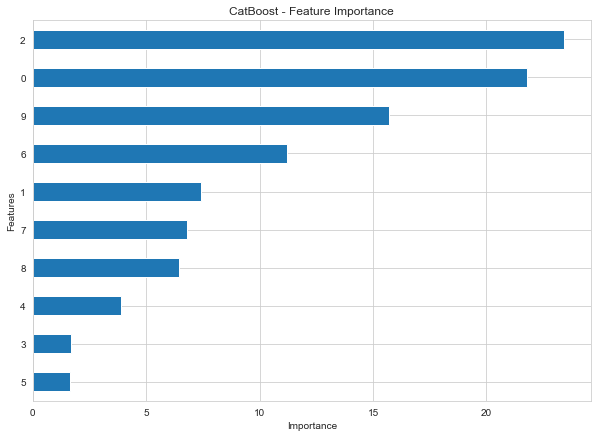

In [393]:
fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': df_cat_train.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('CatBoost - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance');

In [401]:
model.score(df_cat_valid,y_valid)

0.07440775723149795

# Using the Best Model to predict the Test Set

In [584]:
y_data_test_pred_inverse_transf = sc_y.inverse_transform(grid_search_svr.predict(X_data_test_opt_scaled))

In [587]:
y_data_test_pred_inverse_transf

array([1.87524379, 3.24645339, 2.55939272, ..., 2.44245295, 2.33374624,
       1.38451047])

In [609]:
len(y_data_test_pred_inverse_transf)

4500

In [610]:
submission = pd.read_csv('intern_test.csv')

In [611]:
submission['y'] = pd.DataFrame(y_data_test_pred_inverse_transf)

In [612]:
submission = submission.drop(['a','b','c','d','e','f','g','h'], axis=1)

In [613]:
submission = submission.rename(columns = {submission.columns[0]:'ID'})

In [614]:
submission

,ID,y
0,1,1.875244
1,2,3.246453
2,3,2.559393
3,4,2.635988
4,5,3.277470
5,6,1.848236
6,8,2.632674
7,9,2.249622
8,10,2.902896
9,11,3.527176


In [608]:
submission.to_csv("Submission2.csv")

In [588]:
# my_model.booster_.save_model('mode.txt')
# #load from model:

# bst = lgb.Booster(model_file='mode.txt')


# import joblib
# # save model
# joblib.dump(my_model, 'lgb.pkl')
# # load model
# gbm_pickle = joblib.load('lgb.pkl')